# Algoritmos de Clustering

- Aprendizaje **no supervisado**

- **Objetivo**: Agrupar de manera coherente un conjunto de datos sin etiquetar en subconjuntos o *cluster*

- Agrupación de los datos mediante el **concepto de proximidad** entre ellos

    - **Métrica**: método concreto con el que se evalúa la cercanía entre los puntos
    - Ejemplo rudimentario de clustering: Escoger una o varias dimensiones y definir cada *cluster* como el conjunto de elementos que comparten valores en esas dimensiones. Ejemplo: Si eliges la dirección IP, se define un cluster por cada dirección IP (GROUP BY de SQL)

## K-means

El algoritmo *K-means* (MacQueen, 1967) agrupa las observaciones en un número predefinido de *K clusters* de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible.

### Algoritmo K-means

Algoritmo de *Clustering* más utilizado y popular

La métrica que utiliza para calcular la distancia entre los puntos es la **distancia Euclidea**
$$
d(p,q)=\sqrt{(p_x-q_x)^2+(p_y-q_y)^2}=\|p-q\|^2
$$

Algoritmo **sencillo** que **escala muy bien** a grandes conjuntos de datos

Consideremos $C_1,\ldots,C_k$ como los sets formados por los índices de las observaciones de cada uno de los clusters. Por ejemplo, el set $C_1$ contiene los índices de las observaciones agrupadas en el *cluster* 1. La nomenclatura empleada para indicar que la observación $i$ pertenece al *cluster k* es:  $i\in C_k$. Todos los sets satisfacen dos propiedades:

- $C_1\cup C_2\cup\cdots\cup C_k=\{1,\ldots,n\}$. Significa que todas observación pertenece a uno de los *K clusters*.

- $C_k\cap C_{k'}=\emptyset$ para $k\neq k'$. Implica que los *clusters* no solapan, ninguna observación pertenece a más de un *cluster* a la vez.

Dos de las medidas comúnmente empleadas para cuantifica la varianza interna de un *cluster* ($W(C_k)$) son:

- La suma de las distancias euclideas al cuadrado entre cada observación $(x_i)$ y el centroide ($\mu$) de su *cluster*. Esto equivale a la suma de cuadrados internos del *cluster* y es la métrica que utiliza `scikitlearn`.

- La suma de las distancias euclideas al cuadrado entre todos los pares de observaciones que forman el *cluster*, dividida entre el número de observaciones del *cluster*.
$$
W(C_k)=\frac{1}{|C_k|}\sum_{i,i'\in C_k}\sum_{j=1}^p(x_{ij}-x_{i'j})^2
$$
**Minimizar** la suma total de varianza interna $\sum_{k=1}^K W(C_k)$ de forma exacta (encontrar el minimo global) es un proceso muy complejo debido a la inmensa cantidad de formas en las que las $n$ observaciones se pueden repartir en $K$ sets. En lugar de esto, *k-means* trata de encontrar una solución que, aun no siendo la mejor de entre todas las posibles, sea buan (óptimo local). El algoritmo empleado es:

1. Especificar el número *K* de *clusters* que se quieren crear.

2. Seleccionar de forma aleatoria *k* observaciones del set de datos como centroides iniciales.

3. Asignar cada una de las observaciones al centroide más cercano.

3. Para cada uno de los *K clusters* generados en el paso 3, recalcular su centroide.

4. Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.

Este algoritmo garantiza que, en cada paso, se reduzca la intra-varianza total de los *clusters* hasta alcanzar un *óptimo local*. Debido a que el algoritmo de *K-means* no evalúa todas las posibles distribuciones de las observaciones sino solo parte de ellas, los resultados obtenidos dependen de la asignación aleatoria inicial (paso 2). Por esta razón, es importante ejecutar el algoritmo varias veces (25-50), cada una con una asignación aleatoria inicial distinta, y seleccionar aquella que haya conseguido una menor varianza total.

### Limitaciones del Algoritmo K-means

- Se debe *intuir el número de clusters** que genera el algoritmo. Si son datos etiquetados, elegir el número de *clusters* como un valor entre uno y tres veces el número de etiquetas existentes

- Hay que **aplicar normalización** al conjunto de datos

- Los datos categóricos deben codificarse con multiple binary, antes de aplicar el algoritmo KMEANS

- Pierde eficiencia en conjuntos de datos con muchas dimensiones. Una practica frecuente es **reducir las dimensiones del conjunto de datos** mediante el uso de PCA

- Funciona mejor si los ***centroides* iniciales se eligen aleatoriamente**. Esto provoca que los resultados pueden cambiar dependiendo de donde se inicialicen

- Asume que los **cluster son esféricos**. No funciona correctamente en distribuciones de datos no esféricas.

- Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los *centroides*. Para minimizar este problema, se recomienda repetir el proceso de clustering entre 25-50 veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.

- Presenta problemas de robustez frente a outliers. La única solución es excluirlos o recurrir a otros métodos de clustering más robustos como K-medoids (PAM).

## K-medoids

### Algoritmo K-medoids

*K-medoids* es un método de *clustering* muy similar a *K-means* en cuanto a que ambos agrupan las observaciones en *K clusters*, donde *K* es un valor preestablecido por el analista. La diferencia es que, en *K-medoids*, cada cluster está representado por una observación presente en el *cluster (medoid)*, mientras que en *K-means* cada *cluster* está representado por su centroide, que se corresponde con el promedio de todas las observaciones del cluster pero con ninguna en particular.

Una definición más exacta del término *medoid* es: elemento dentro de un *cluster* cuya distancia (diferencia) promedio entre él y todos los demás elementos del mismo *cluster* es lo menor posible. Se corresponde con el elemento más central del cluster y por lo tanto puede considerarse como el más representativo. El hecho de utilizar *medoids* en lugar de centroides hace de *K-medoids* un método más robusto que *K-means*, viéndose menos afectado por *outliers* o ruido. A modo de idea intuitiva puede considerarse como la analogía entre media y mediana.

El algoritmo más empleado para aplicar *K-medoids* se conoce como *PAM (Partitioning Around Medoids)* y sigue los siguientes pasos:

1. Seleccionar *K* observaciones aleatorias como *medoids* iniciales. También es posible identificarlas de forma específica.

2. Calcular la matriz de distancia entre todas las observaciones si esta no se ha calculado anteriormente.

3. Asignar cada observación a su *medoid* más cercano.

4. Para cada uno de los *clusters* creados, comprobar si seleccionando otra observación como *medoid* se consigue reducir la distancia promedio del *cluster*, si esto ocurre, seleccionar la observación que consigue una mayor reducción como nuevo *medoid*.

5. Si al menos un medoid ha cambiado en el paso 4, volver al paso 3, de lo contrario, se termina el proceso.

A diferencia del algoritmo *K-means*, en el que se minimiza la suma total de cuadrados intra-cluster (suma de las distancias al cuadrado de cada observación respecto a su centroide), el algoritmo *K-medoids* minimiza la suma de las diferencias de cada observación respecto a su *medoid*.

Por lo general, el método de *K-medoids* se utiliza cuando se conoce o se sospecha de la presencia de *outliers*. Si esto ocurre, es recomendable utilizar como medida de similitud la distancia de Manhattan, ya que es menos sensible a outliers que la euclídea.

### Limitaciones del Algoritmo K-medoids

- *K-medoids* es un método de clustering más robusto que *K-means*, por lo es más adecuado cuando el set de datos contiene outliers o ruido.

- Al igual que *K-means*, necesita que se especifique de antemano el número de *clusters* que se van a crear. Esto puede ser complicado de determinar si no se dispone de información adicional sobre los datos. Muchas de las estrategias empleadas en *K-means* para identificar el número óptimo, pueden aplicarse en *K-medoids*.

- Para sets de datos grandes se necesitan muchos recursos computacionales. En tal situación se recomienda aplicar el método CLARA.

El algoritmo *K-medoids* está implementado en la clase `KMedoids` de la librería `sklearn_extra`. Su funcionamiento es análogo al descrito en el apartado de K-means. También está disponible en la librería `PyClustering`.

## Hierarchical clustering

*Hierarchical clustering* es una alternativa a los métodos de *partitioning clustering* que no requiere que se pre-especifique el número de clusters. Los métodos que engloba el hierarchical clustering se subdividen en dos tipos dependiendo de la estrategia seguida para crear los grupos:

- Aglomerativo (*agglomerative clustering o bottom-up*): el agrupamiento se inicia con todas las observaciones separadas, cada una formando un *cluster* individual. Los clusters se van combinado a medida que la estructura crece hasta converger en uno solo.

- Divisivo (*divisive clustering o top-down*): es la estrategia opuesta al aglomerativo. Se inicia con todas las observaciones contenidas en un mismo cluster y se suceden divisiones hasta que cada observación forma un cluster* individual.

En ambos casos, los resultados pueden representarse de forma muy intuitiva en una estructura de árbol llamada dendrograma.

### Aglomerativo

El algoritmo seguido para por el *clustering* aglomerativo es:

1. Considerar cada una de las $n$ observaciones como un *cluster* individual, formando así la base del dendrograma (hojas).

2. Proceso iterativo hasta que todas las observaciones pertenecen a un único *cluster*:

    2.1 Calcular la distancia entre cada posible par de los $n$ *clusters*. El investigador debe determinar el tipo de medida empleada para cuantificar la similitud entre observaciones o grupos (distancia y *linkage*).

    2.2 Los dos *clusters* más similares se fusionan, de forma que quedan $n-1$ *clusters*.

3. Cortar la estructura de árbol generada (dendrograma) a una determinada altura para crear los *clusters* finales.



Para que el proceso de agrupamiento pueda llevarse a cabo tal como indica el algoritmo anterior, es necesario definir cómo se cuantifica la similitud entre dos *clusters*. Es decir, se tiene que extender el concepto de distancia entre pares de observaciones para que sea aplicable a pares de grupos, cada uno formado por varias observaciones. A este proceso se le conoce como *linkage*. A continuación, se describen los 5 tipos de *linkage* más empleados y sus definiciones.

- **Complete or Maximum**: se calcula la distancia entre todos los posibles pares formados por una observación del *cluster A* y una del *cluster B*. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora (*maximal intercluster dissimilarity*).

- **Single or Minimum**: se calcula la distancia entre todos los posibles pares formados por una observación del *cluster A* y una del *cluster B*. La menor de todas ellas se selecciona como la distancia entre los dos *clusters*. Se trata de la medida menos conservadora (*minimal intercluster dissimilarity*).

- **Average**: Se calcula la distancia entre todos los posibles pares formados por una observación del *cluster A* y una del *cluster B*. El valor promedio de todas ellas se selecciona como la distancia entre los dos *clusters* (*mean intercluster dissimilarity*).

- **Centroid**: Se calcula el centroide de cada uno de los *clusters* y se selecciona la distancia entre ellos como la distancia entre los dos *clusters*.

- **Ward**: Se trata de un método general. La selección del par de *clusters* que se combinan en cada paso del *agglomerative hierarchical clustering* se basa en el valor óptimo de una función objetivo, pudiendo ser esta última cualquier función definida por el analista. El método *Ward's minimum variance* es un caso particular en el que el objetivo es minimizar la suma total de varianza *intra-cluster*. En cada paso, se identifican aquellos 2 clusters cuya fusión conlleva menor incremento de la varianza total *intra-cluster*. Esta es la misma métrica que se minimiza en *K-means*.

Los métodos de *complete, average y Ward's minimum variance* suelen ser los preferidos por los analistas debido a que generan dendrogramas más compensados. Sin embargo, no se puede determinar que uno sea mejor que otro, ya que depende del caso de estudio en cuestión. Por ejemplo, en genómica, se emplea con frecuencia el método de *centroides*. Junto con los resultados de un proceso de *hierarchical clustering* siempre hay que indicar qué distancia se ha empleado, así como el tipo de *linkage*, ya que, dependiendo de estos, los resultados pueden variar en gran medida.


### Dendrograma

Los resultados del **hierarchical clustering** pueden representarse como un árbol en el que las ramas representan la jerarquía con la que se van sucediendo las uniones de *clusters*.

Supóngase que se dispone de 45 observaciones en un espacio de dos dimensiones, a los que se les aplica *hierarchical clustering* para intentar identificar grupos. El siguiente dendrograma representa los resultados obtenidos.

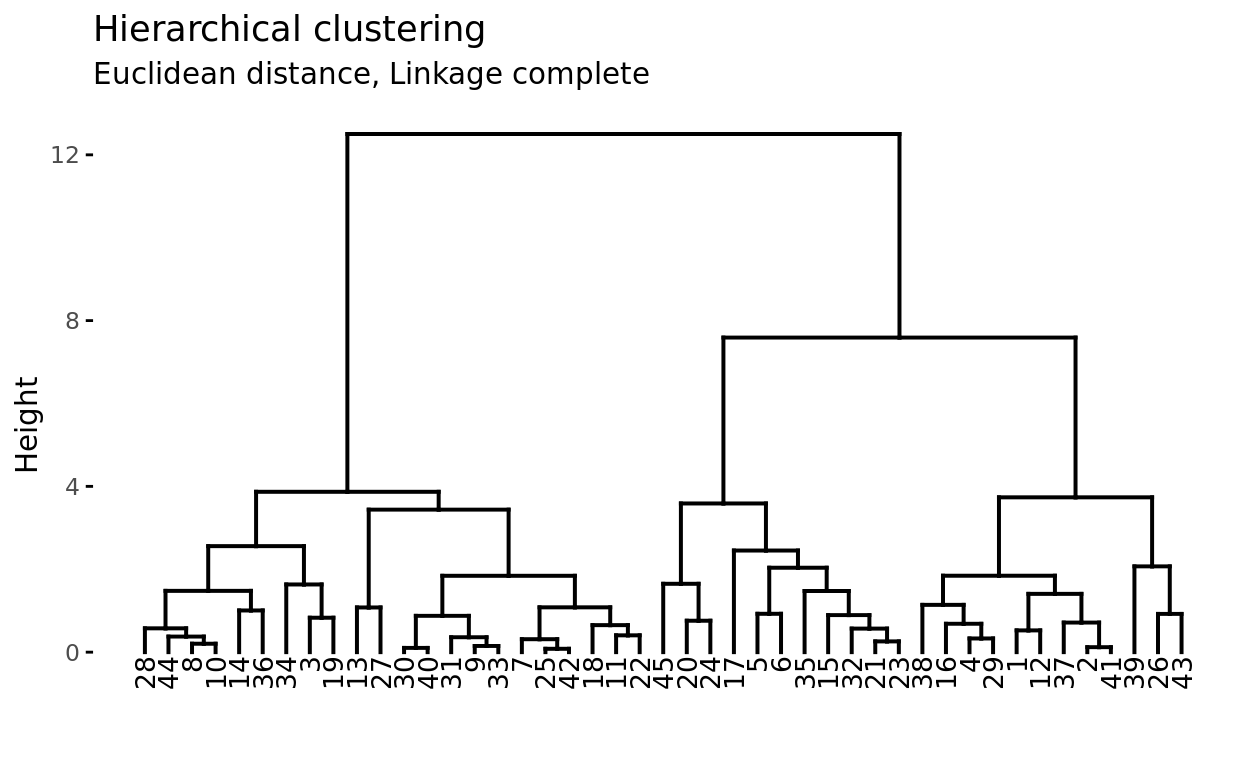

En la base del dendrograma, cada observación forma una terminación individual conocida como hoja o *leaf* del árbol. A medida que se asciende por la estructura, pares de hojas se fusionan formando las primeras ramas. Estas uniones se corresponden con los pares de observaciones más similares. También ocurre que las ramas se fusionan con otras ramas o con hojas. Cuanto más temprana (más próxima a la base del dendrograma) ocurre una fusión, mayor es la similitud.

Para cualquier par de observaciones, se puede identificar el punto del árbol en el que las ramas que contienen dichas observaciones se fusionan. La altura a la que esto ocurre (eje vertical) indica cómo de similares/diferentes son las dos observaciones. Los dendrogramas, por lo tanto, se deben interpretar únicamente en base al eje vertical y no por las posiciones que ocupan las observaciones en el eje horizontal, esto último es simplemente por estética y puede variar de un programa a otro.

Por ejemplo, la observación 8 es la más similar a la 10 ya que es la primera fusión que recibe la observación 10 (y viceversa). Podría resultar tentador decir que la observación 14, situada inmediatamente a la derecha de la 10, es la siguiente más similar, sin embargo, las observaciones 28 y 44 son más similares a la 10 a pesar de que se encuentran más alejadas en el eje horizontal. Del mismo modo, no es correcto decir que la observación 14 es más similar a la observación 10 de lo que lo es la 36 por el hecho de que está más próxima en el eje horizontal. Prestando atención a la altura en que las respectivas ramas se unen, la única conclusión válida es que la similitud entre los pares 10-14 y 10-36 es la misma.

### Cortar el dendograma para generar los clusters

Además de representar en un dendrograma la similitud entre observaciones, se tiene que identificar el número de *clusters* creados y qué observaciones forman parte de cada uno. Si se realiza un corte horizontal a una determinada altura del dendrograma, el número de ramas que sobrepasan (en sentido ascendente) dicho corte se corresponde con el número de *clusters*. La siguiente imagen muestra dos veces el mismo dendrograma. Si se realiza el corte a la altura de 5, se obtienen dos *clusters*, mientras que si se hace a la de 3.5 se obtienen 4. La altura de corte tiene por lo tanto la misma función que el valor *K* en *K-means-clustering*: controla el número de clusters obtenidos.

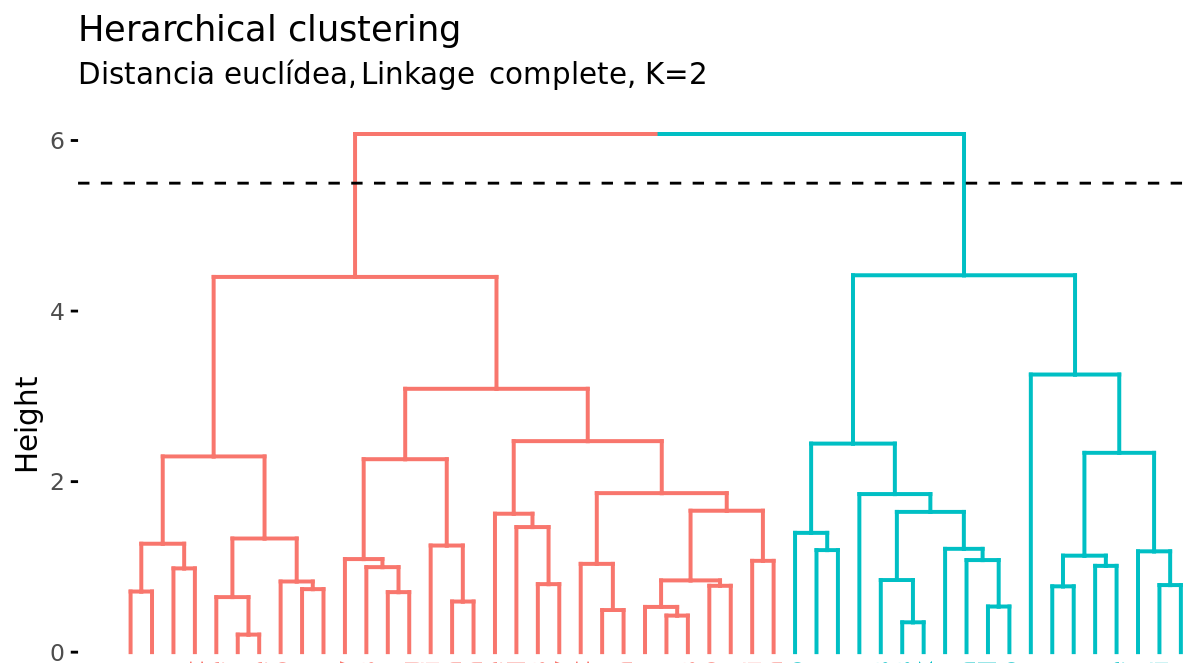

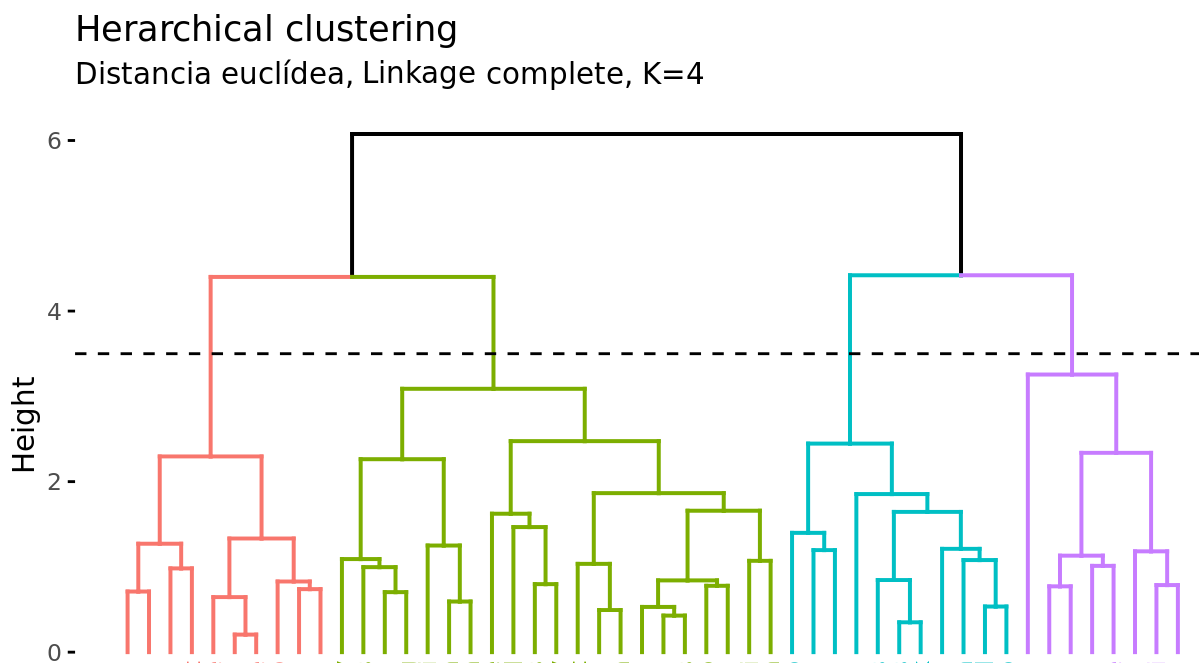

Dos propiedades adicionales se derivan de la forma en que se generan los *clusters* en el método de *hierarchical clustering*:

- Dada la longitud variable de las ramas, siempre existe un intervalo de altura para el que cualquier corte da lugar al mismo número de clusters. En el ejemplo anterior, todos los cortes entre las alturas 5 y 6 tienen como resultado los mismos *2 clusters*.

- Con un solo dendrograma se dispone de la flexibilidad para generar cualquier número de clusters desde 1 a n. La selección del número óptimo puede valorarse de forma visual, tratando de identificar las ramas principales en base a la altura a la que ocurren las uniones. En el ejemplo expuesto es razonable elegir entre 2 o 4 *clusters*.

Con la clase `sklearn.cluster.AgglomerativeClustering` de `Scikit-Learn` se pueden entrenar modelos de clustering utilizando el algoritmo *hierarchical clustering aglomerativo*.

## Density based clustering (DBSCAN)

*Density-based spatial clustering of applications with noise (DBSCAN)* fue presentado en 1996 por Ester *et al*. como una forma de identificar clusters siguiendo el modo intuitivo en el que lo hace el cerebro humano, identificando regiones con alta densidad de observaciones separadas por regiones de baja densidad.

Veamos una representación bidimensional

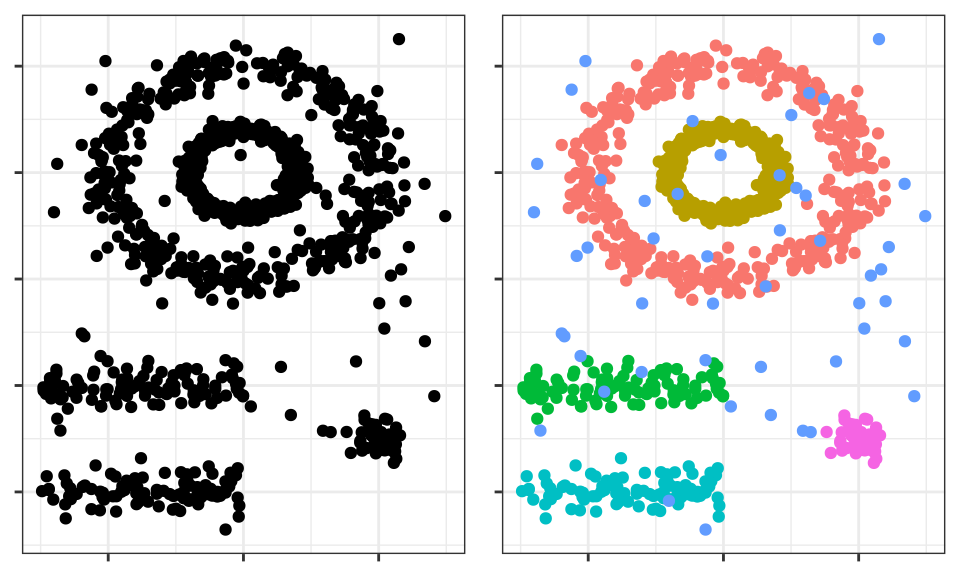

El cerebro humano identifica fácilmente 5 agrupaciones y algunas observaciones aisladas (ruido). Véanse ahora los clusters que se obtienen si se aplica, por ejemplo, *K-means clustering*.

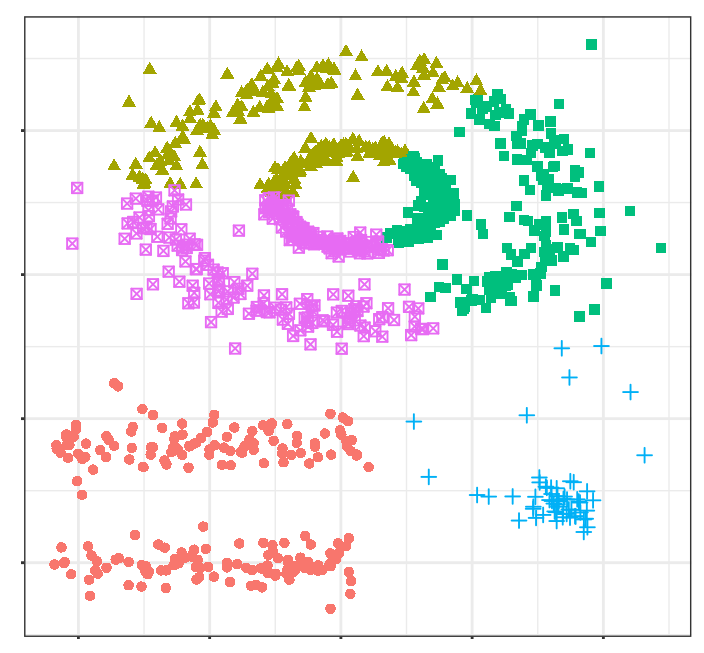

Los *clusters* generados distan mucho de representar las verdaderas agrupaciones. Esto es así porque los métodos de partitioning clustering como *k-means*, *hierarchical*, *k-medoids*, ... son buenos encontrando agrupaciones con forma esférica o convexa que no contengan un exceso de outliers o ruido, pero fallan al tratar de identificar formas arbitrarias. De ahí que el único *cluster* que se corresponde con un grupo real sea el amarillo.

**DBSCAN** evita este problema siguiendo la idea de que, para que una observación forme parte de un cluster, tiene que haber un mínimo de observaciones vecinas dentro de un radio de proximidad y de que los *clusters* están separados por regiones vacías o con pocas observaciones.

El algoritmo *DBSCAN* necesita dos parámetros:

- **Epsilon** ($\epsilon$): radio que define la región vecina a una observación, también llamada $\epsilon$-neighborhood.

- **MinPoints**: número mínimo de observaciones dentro de la región *epsilon*.

Empleando estos dos parámetros, cada observación del set de datos se puede clasificar en una de las siguientes tres categorías:

- **Core point**: observación que tiene en su *$\epsilon$-neighborhood* un número de observaciones vecinas igual o mayor a *MinPoints*.

- **Border point**: observación no satisface el mínimo de observaciones vecinas para ser core point pero que pertenece al *$\epsilon$-neighborhood* de otra observación que sí es *core point*.

- **Noise Point u outlier**: observación que no es *core point* ni *border point*.

Por último, empleando las tres categorías anteriores se pueden definir tres niveles de conectividad entre observaciones:

- Directamente alcanzable (*direct density reachable*): una observación $A$ es directamente alcanzable desde otra observación $B$ si $A$ forma parte del *$\epsilon$-neighborhood* de $B$ y $B$ es un *core point*. Por definición, las observaciones solo pueden ser directamente alcanzables desde un *core point*.

- Alcanzable (*density reachable*): una observación  $A$ es alcanzable desde otra observación $B$ si existe una secuencia de *core points* que van desde  $B$ a $A$.
 
- Densamente conectadas (*density conected*): dos observaciones $A$ y $B$ están densamente conectadas si existe una observación *core point* $C$ tal que  $A$ y $B$ son alcanzables desde $C$ 
 .

La siguiente imagen muestra las conexiones existentes entre un conjunto de observaciones si se emplea  *MinPoints=4*. La observación $A$ y el resto de observaciones marcadas en rojo son *core points*, ya que todas ellas contienen al menos 4 observaciones vecinas (incluyéndose a ellas mismas) en su *$\epsilon$-neighborhood*. Como todas son alcanzables entre ellas, forman un *cluster*. Las observaciones $B$ y $C$ no son *core points* pero son alcanzables desde $A$ a través de otros *core points*, por lo tanto, pertenecen al mismo cluster que $A$. La observación $N$ no es ni un *core point* ni es directamente alcanzable, por lo que se considera como ruido.
 

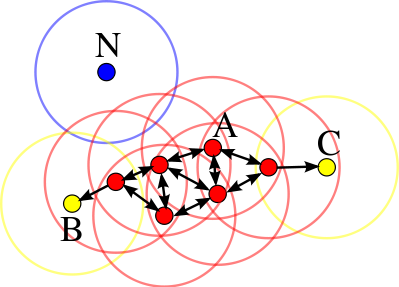

### Algoritmo

1. Para cada observación $x_i$ calcular la distancia entre ella y el resto de observaciones. Si en su *$\epsilon$-neighborhood* hay un número de observaciones *≥ MinPoints* marcar la observación como *core point*, de lo contrario marcarla como visitada.

2. Para cada observación $x_i$ marcada como *core point*, si todavía no ha sido asignada a ningún *cluster*, crear uno nuevo y asignarla a él. Encontrar recursivamente todas las observaciones densamente conectadas a ella y asignarlas al mismo *cluster*.

3. Iterar el mismo proceso para todas las observaciones que no hayan sido visitadas.

4. Aquellas observaciones que tras haber sido visitadas no pertenecen a ningún *cluster* se marcan como *Noise Points*.

Como resultado, todo *cluster* cumple dos propiedades: todos los puntos que forman parte de un mismo cluster están densamente conectados entre ellos y, si una observación $A$ es densamente alcanzable desde cualquier otra observación de un cluster, entonces $A$ también pertenece al cluster.

### Ventajas y desventajas

**Ventajas**

- No requiere que el usuario especifique el número de clusters.

- Es independiente de la forma que tengan los *clusters*.

- Puede identificar *outliers*, por lo que los *clusters* generados no se ven influenciados por ellos.

**Desventajas**

- Es un método determinístico siempre y cuando el orden de los datos sea el mismo. Los *border points* que son alcanzables desde más de un *cluster* pueden asignarse a uno u otro dependiendo del orden en el que se procesen los datos.

- No genera buenos resultados cuando la densidad de los grupos es muy distinta, ya que no es posible encontrar los parámetros $\epsilon$ y *minPoint* que sirvan para todos a la vez.


## Evaluación de los resultados

El clustering se corresponde con un método basado en aprendizaje *no supervisado*

Para un conjunto de datos *etiquetados* existen varias métricas de evaluación de los resultados:

- **Homogeneidad**: Grado en el *clusters* contienen miembros de una clase

- **Plenitud**: El grado por el que todos los miembros de una clase determinada han sido asignados al mismo *cluster*

- **V-measure**: Métrica basada en la homogeneidad y en la plenitud que representa la precisión de las operaciones en agrupamiento

- **Pureza**: Para calcular la pureza, cada grupo se asigna a la clase que es más frecuente en el grupo, y luego la presición de esta asignación se mide contando el número de documentos asignados correctamente y dividiendo por el número de elementos

En la mayoría de los casos de uso probablemente no dispongamos de las etiquetas de los ejemplos de entrenamientos. No se puede usar la homogeneidad ni la plenitud porque requiere las etiquetas.

Para este tipo de casos existen dos métricas principales:

- **Silhouette coefficient**

- **Calinski-Harabaz index**

### Silhouette coefficient

Se calcula de manera independiente para cada ejemplo en el conjunto de datos

Utilizando una métrica de distancia (por ejemplo, distancia euclidea), encontramos las siguientes dos distancias medias para una muestra $x$:

- **a**: la distancia media entre la muestra $x$ y todas las demás muestras en el mismo cluster

- **b**: la distancia media entre la muestra $x$ y todas las demás muestras en el siguiente cluster más cercano

$$
s=\dfrac{b-a}{max\{a,b\}}
$$

si $b>>a$, entonces $s\approx 1$ (buena predicción)

si $a>>b$, entonces $s\approx -1$ (mala predicción)

El resultado se encuentra entre -1 y 1

Cuanto más cercano sea de 1 mejor se considera el resultado del algoritmo de clustering

Cuando el resultado se encuentra próximo a 0, significa que tendremos *clusters* que se superponen

Esta métrica funciona bien para algoritmos de clsutering basados en distancia como *k-means*

Esta métrica no funciona bien para algoritmos de clustering basados en densidad como *DBSCAN*

### Calinski-Harabaz index

Considera que el resultado del algoritmo de clustering es bueno si se forman *clusters* *visiblemente separados* y *densamente reunidos*

Utiliza dos medidas ($k$ es el número de *clusters*):

- **Wk**: la dispersión dentro del **cluster**, una matriz de distancia entre muestras en un *cluster* y el centro geométrico del mismo

- **Bk**: la dispersión entre grupos, una matriz de distancia entre el centro de un *cluster* y los centros de todos los otros *clusters*
$$
s=\dfrac{B_k}{W_k}\times \dfrac{m-k}{k-1}
$$

donde $m$ es el número de ejemplo

Cuanto mayor sea el resultado de esta métrica, más densos y separados están los *clusters*

Funciona bien para algoritmos de clustering basados en densidad, como *DBSCAN*